Import necessary libraries

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Load and preprocess dataset

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Create fully connected network layers

In [14]:
input_layer_fc = Input(shape=(28, 28, 1))
flatten_fc = Flatten()(input_layer_fc)
dense1_fc = Dense(128, activation='relu')(flatten_fc)
dense2_fc = Dense(64, activation='relu')(dense1_fc)
output_layer_fc = Dense(10, activation='softmax')(dense2_fc)
fc_model = tf.keras.Model(inputs=input_layer_fc, outputs=output_layer_fc)
fc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Create CNN layers

In [15]:
input_layer_cnn = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer_cnn)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
flatten_cnn = Flatten()(pool2)
dense1_cnn = Dense(128, activation='relu')(flatten_cnn)
output_layer_cnn = Dense(10, activation='softmax')(dense1_cnn)
cnn_model = tf.keras.Model(inputs=input_layer_cnn, outputs=output_layer_cnn)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train model

In [16]:
fc_train_loss_history = []
fc_train_accuracy_history = []
fc_val_loss_history = []
fc_val_accuracy_history = []

cnn_train_loss_history = []
cnn_train_accuracy_history = []
cnn_val_loss_history = []
cnn_val_accuracy_history = []

for _ in range(5):
    fc_history = fc_model.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test))
    cnn_history = cnn_model.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test))

    fc_train_accuracy_history.append(fc_history.history['accuracy'][0])
    cnn_train_accuracy_history.append(cnn_history.history['accuracy'][0])

    fc_val_accuracy_history.append(fc_history.history['val_accuracy'][0])
    cnn_val_accuracy_history.append(cnn_history.history['val_accuracy'][0])

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0282 - val_accuracy: 0.9916


Show results

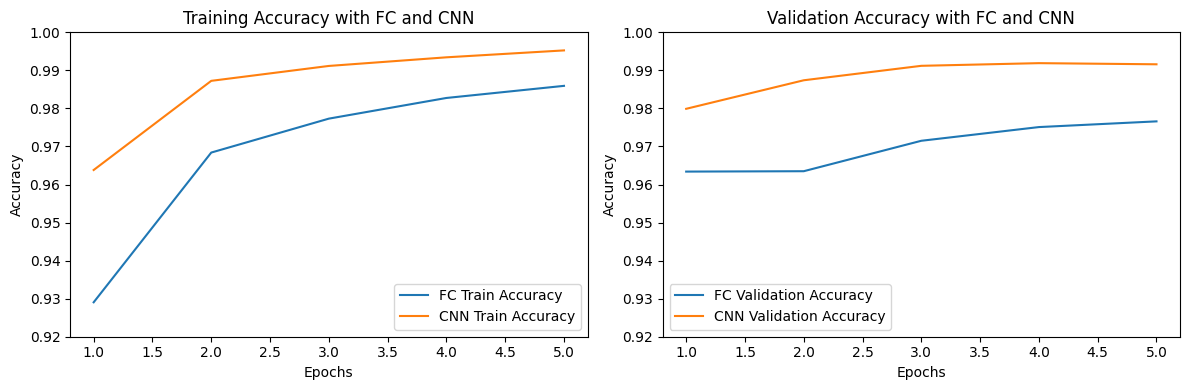

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), fc_train_accuracy_history, label='FC Train Accuracy')
plt.plot(range(1, 6), cnn_train_accuracy_history, label='CNN Train Accuracy')
plt.ylim([0.92, 1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy with FC and CNN')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 6), fc_val_accuracy_history, label='FC Validation Accuracy')
plt.plot(range(1, 6), cnn_val_accuracy_history, label='CNN Validation Accuracy')
plt.ylim([0.92, 1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy with FC and CNN')
plt.legend()

plt.tight_layout()
plt.show()